# Analyzing Call of Duty Player Skills
## Introduction
In this analysis, we will be going over the "call of duty players skills" dataset. This dataset was gathered by Aisha Hakami and consist of many features about Call of Duty players from specificly Modern Warfare (2019). Let's find out the target feature to analyze and it's relationship with 5 other features. Here are the columns.

---**Columns**---
- name : Name of player
- **wins** : Matches won
- kills : Total number of kills
- kdRatio : Kills / Deaths
- killstreak : Highest amount of kills without dying
- **level** : Players level
- losses : Matches loss
- **prestige** : Prestige level
- **hits** : Number of bullets hit
- timePlayed : Time spent playing the game
- headshots : Number of headshots hit
- averageTime : average time playing
- **gamesPlayed** : Number of matches played
- assists : Total number of assists
- misses : Total number of bullets missed
- xp : Total experience gained
- **scorePerMinute** : Amount of score gained per minute
- **shots** : Total number of shots fired
- deaths : Total number of deaths

Looking at these columns, we will choose "level" as our target feature and compare its relationship with "wins", "prestige", "gamesPlayed", accuracy ("hits" / "shots"), and "scorePerMinute". Let's now make sure the dataset is cleaned and loaded in.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cod.csv')
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


##  The 5 Feature Analysis
### 1. Level vs. Wins

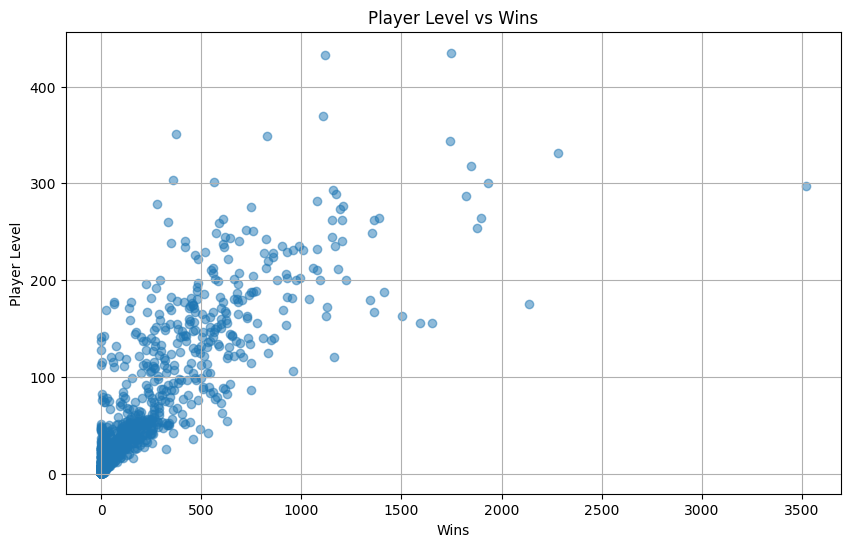

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['wins'], df['level'], alpha=0.5)
plt.title('Player Level vs Wins')
plt.xlabel('Wins')
plt.ylabel('Player Level')
plt.grid(True)

### Explanation
We used a scatter plot to see if winning is the primary driver of leveling up. We can see a positive relationship between the two. As players win more matches, their level goes up. This is great for game developers to visualize and be able to tune how many levels they want their players to be at when they've won a certain amount of games. There seems to also be a huge scatter around 250 wins for players. After 250 the players that go over that become less and less. This tells us that our average player stops around 200 - 250 wins. We could use that data to prioritize our prize system to reward players mainly from 0 - 250 wins.
### 2. Level vs. KD Ratio

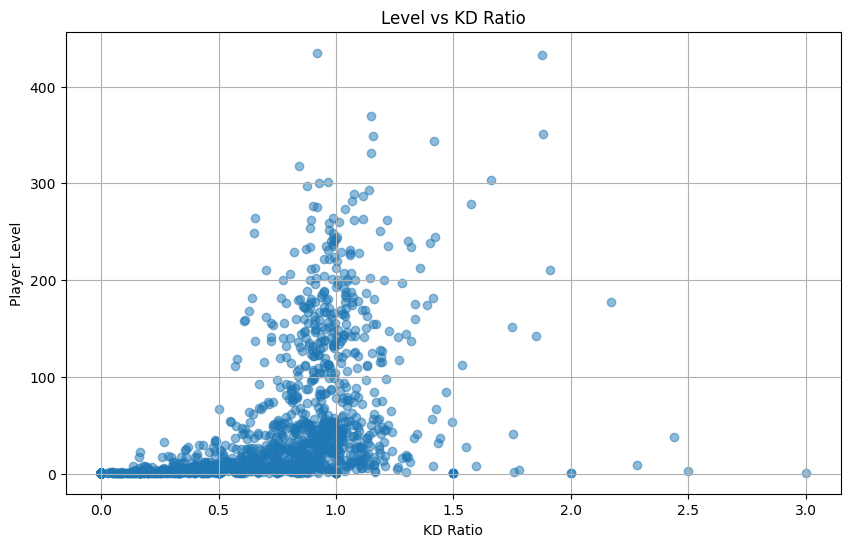

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['kdRatio'], df['level'], alpha=0.5)
plt.title('Level vs KD Ratio')
plt.xlabel('KD Ratio')
plt.ylabel('Player Level')
plt.grid(True)

### Explanation
Here we see a very scattered distribution. We can see high-level players with low KD and low-level players with high KD (likely players who play a few games then leave). Their is no correlation connecting player skill to progression. We chose this graph to see skill is required to progress to high levels. It seems that grinding is more important than raw killing eficiency. This is why developers need to introduce a ranked mode to give the skilled players a place to progress only by skill and not just grinding.
### 3. Level vs. Games Played

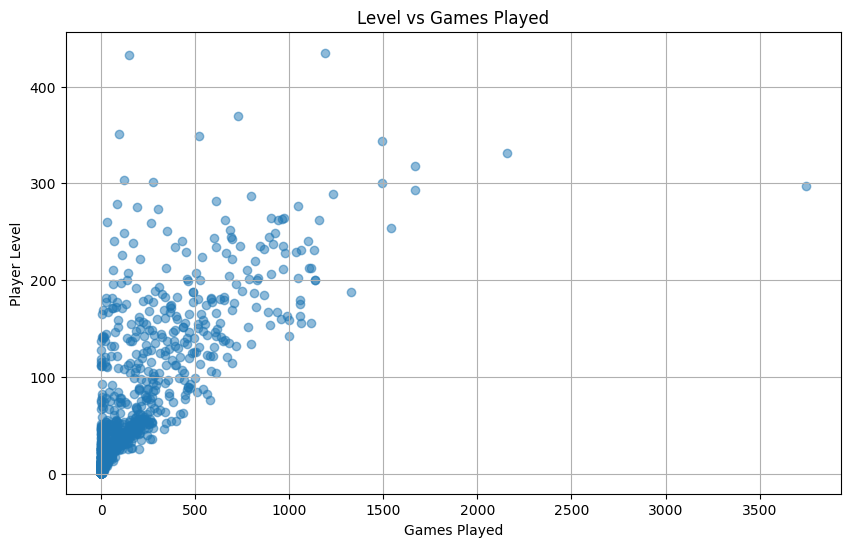

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['gamesPlayed'], df['level'], alpha=0.5)
plt.title('Level vs Games Played')
plt.xlabel('Games Played')
plt.ylabel('Player Level')
plt.grid(True)

### Explanation
Similiar to wins, this graph shows a clear trend. Playing more games pushes you to a higher level. Which duh. But this time since we are using games played and not wins we can see that players level up fast from 0 - 50. Then it slows down after. We can use this data to help tune the player xp progression so players can play further into the levels.
### 4. Level vs. Accuracy

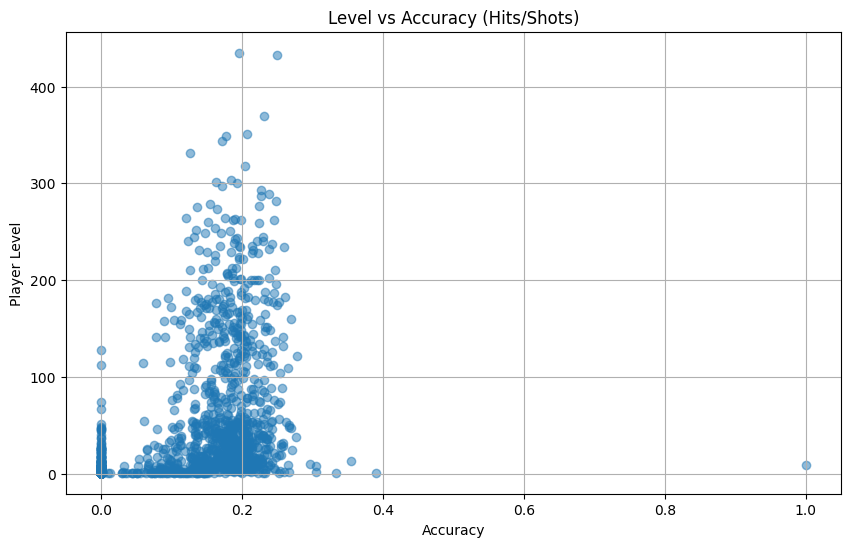

In [23]:
df['accuracy'] = df['hits'] / df['shots']
df['accuracy'] = df['accuracy'].fillna(0)

plt.figure(figsize=(10, 6))
plt.scatter(df['accuracy'], df['level'], alpha=0.5)
plt.title('Level vs Accuracy (Hits/Shots)')
plt.xlabel('Accuracy')
plt.ylabel('Player Level')
plt.grid(True)

### Explanation
We wanted to see if technical proficiency speeds up progression. Zero correlation. Being a sharpshooter does not expedite your leveling process significantly compared to an average player. This suggest that XP rewards for precision might not be high enough for skill-aimed players. We could buff the XP bonuses for accurate fire.
### 5. Level vs. Score Per Minute (SPM)

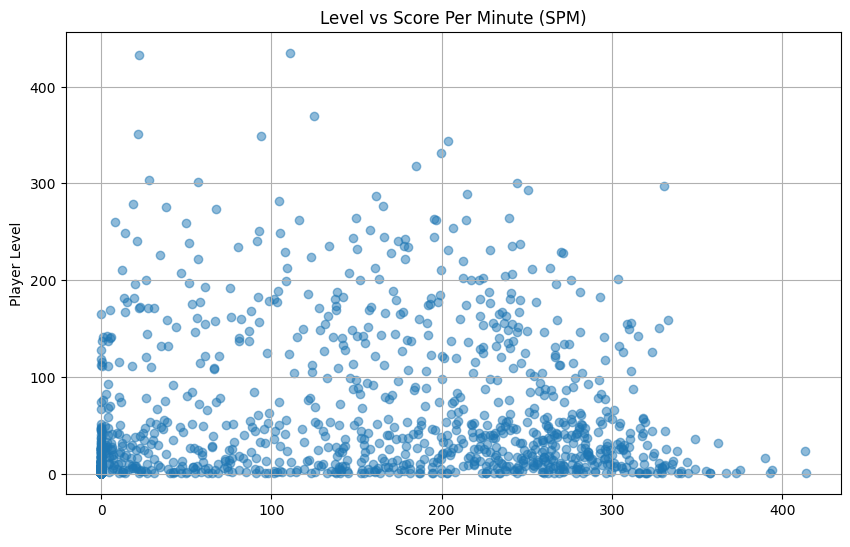

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['scorePerMinute'], df['level'], alpha=0.5)
plt.title('Level vs Score Per Minute (SPM)')
plt.xlabel('Score Per Minute')
plt.ylabel('Player Level')
plt.grid(True)

### Explanation
We used this to verify if aggresive playstyles lead to faster leveling. The data is clustered on the left for all levels, with a few outliers stretching to the right. This shows that most players, regardless of level, play at a similar pace. No strong trend, likely because high SPM is hard to maintain over the long time required to level up. The vertical clustering suggests that the game's pacing is consistent. However, since high SPM doesn't clearly correlate with the highest levels, it implies that the XP system might be capped or that grinding outweighs intensity (scoring fast) for leveling up.

## Conclusion
Based on our analysis, the most significant finding is that player progression (Level) is primarily driven by time investment, as shown by the strong positive correlations with both Wins and Games Played. Conversely, skill-based features like K/D Ratio and Accuracy show almost no correlation with Level, indicating that being a highly skilled marksmen does not significantly expedite the leveling process compared to simply playing more matches. This suggests the game's design intentionally rewards persistence and "grinding" over raw mechanical talent, ensuring that the maximum level is accessible to any player willing to put in the time.